### aim: visualize overturning in PT runs

### date: 

In [101]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [102]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [103]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

#### AMOC references

https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019RG000644

https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015RG000493

when a single-value AMOC number is required, the maximum at 26N is meant. 


## process annotation

`module add gcc/10.3.0`

`module add netcdf/4.7.4/gcc`

toolbox is here: `cd /gpfs/home/mep22dku/cdftools`

need to symlink orca meshmask:

`ln -sf mesh_mask3_6.nc mesh_hgr.nc`

`ln -sf mesh_mask3_6.nc mesh_zgr.nc`

`ln -sf mesh_mask3_6.nc mask.nc`

bashscript for running the toolbox is in `overturning_TOM.sh` in the toolbox directory (change model name!)

it puts results in `/gpfs/home/mep22dku/cdftools/MOCresults` with name of run in filename

In [104]:


def make_yearlist(yrst, yrend, tr, baseDir = '/gpfs/home/mep22dku/cdftools/MOCresults/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        tyr = yrs[i]
        ty = f'{baseDir}{tr}_1m_{tyr}0101*MOC.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist



Text(0, 0.5, 'depth (km)')

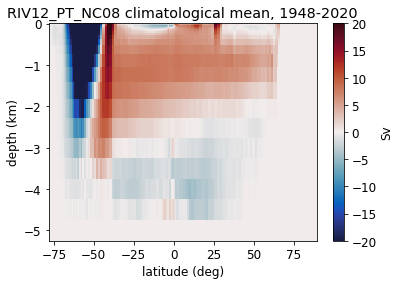

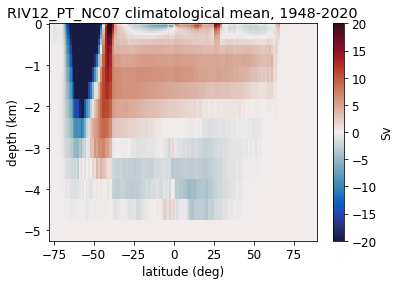

In [105]:
tfil = 'RIV12_PT_NC08'
tlist = make_yearlist(1948,2020,tfil)

w = xr.open_mfdataset(tlist)
wdepths = (w['depthw'][:])
lats = (w['nav_lat'][0,:,0])

over_yr_NC08 =  w.resample(time_counter="Y").mean() 

tw = np.nanmean(over_yr_NC08['zomsfatl'].values, axis = 0)
plt.figure()
# plt.gca().invert_yaxis()
q =plt.pcolormesh(lats, wdepths/1000, tw[:,:,0], vmin = -20, vmax = 20, cmap = cm.balance)
plt.colorbar(q, label = 'Sv')
plt.title(f'{tfil} climatological mean, 1948-2020')
plt.xlabel('latitude (deg)')
plt.ylabel('depth (km)')

tfil = 'RIV12_PT_NC07'
tlist = make_yearlist(1948,2020,tfil)

w = xr.open_mfdataset(tlist)
wdepths = (w['depthw'][:])
lats = (w['nav_lat'][0,:,0])

over_yr_NC07 =  w.resample(time_counter="Y").mean() 

tw = np.nanmean(over_yr_NC07['zomsfatl'].values, axis = 0)
plt.figure()
# plt.gca().invert_yaxis()
q =plt.pcolormesh(lats, wdepths/1000, tw[:,:,0], vmin = -20, vmax = 20, cmap = cm.balance)
plt.colorbar(q, label = 'Sv')
plt.title(f'{tfil} climatological mean, 1948-2020')
plt.xlabel('latitude (deg)')
plt.ylabel('depth (km)')


In [106]:
q = tar.time_counter.values
print(q)


NameError: name 'tar' is not defined

In [ ]:
atl_at_26_NC08 = over_yr_NC08.zomsfatl.sel(y=94)
atl_at_26_NC07 = over_yr_NC07.zomsfatl.sel(y=94)

tcm = 'Spectral'
tcm = plt.cm.get_cmap('Spectral')


atl_at_26_max_NC08 = np.arange(1948,2021,1).astype(float)
atl_at_26_max_NC07 = np.arange(1948,2021,1).astype(float)

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,73):
    tar = atl_at_26_NC08.isel(time_counter = i)
    if (i+8)%10 == 0:
        axs[1].plot(tar,tar['depthw'], linewidth = 2.5, label = tar.time_counter.values, color = tcm(1.*(i)/73))
    else:
        axs[1].plot(tar,tar['depthw'], linewidth = 0.5, alpha = 0.5, color = tcm(1.*(i)/73))
    atl_at_26_max_NC08[i] = np.nanmax(tar.values)
    
    
    tar = atl_at_26_NC07.isel(time_counter = i)
    if (i+8)%10 == 0:
        axs[0].plot(tar,tar['depthw'], linewidth = 2.5, label = tar['time_counter'], color = tcm(1.*(i)/73))
    else:
        axs[0].plot(tar,tar['depthw'], linewidth = 0.5, alpha = 0.5, color = tcm(1.*(i)/73))
    atl_at_26_max_NC07[i] = np.nanmax(tar.values)
    
axs[0].set_title('RIV12_PT_NC07')
axs[1].set_title('RIV12_PT_NC08')
axs[1].legend()
axs[0].grid()
axs[1].grid()
plt.suptitle('AMOC at 26N')
axs[0].set_xlabel('Sv')
axs[0].set_ylabel('m')

In [ ]:
yrs = np.arange(1948,2021)

plt.plot(yrs,atl_at_26_max_NC07, label = 'NC07')
plt.plot(yrs,atl_at_26_max_NC08, label = 'NC08')        
plt.legend()
plt.xlabel('year')
plt.ylabel('AMOC at 26N, Sv')